# 🌿💡 Agri-Analytics: Forecasting Yields from Soil to Sun 🌞💧

## Problem Statement  
The problem at hand is predicting the **crop yield (kg per hectare)** based on various factors, such as:  
- 🌱 **Soil quality**  
- 🌾 **Seed variety**  
- 🧪 **Fertilizer usage**  
- 🌞 **Weather conditions** (sunny days and rainfall)  
- 💧 **Irrigation practices**  

The goal is to understand how each feature influences the crop yield and make accurate predictions based on these features.  

---

## Objective of *Prediction**:  
   - 🎯 The primary objective is to predict the **crop yield (kg per hectare)** based on i  **Optimization**:  
   - 🔧 By analyzing the impact of factors like soil quality, fertilizer usage, and irrigation schedules, the model aims to help **optimize farming practices** f **Decision Support**:  
   - 🧠 Provide insights to farmers and agricultural planners on how to adjust factors such as fertilizer amounts or irrigation schedules based on **expected weather conditions  **Resource Allocation**:  
   - 📊 Help farmers plan their resources effectively by predicting yields under varying conditions. For example:  
     - How much **water** or **fertilizer** to use.  
     - When to apply these resources for maximum yield.  

---

## Dataset Columns Description 🌾📋  

| **Column Name**                          | **Description**                                                                                     |  
|------------------------------------------|-----------------------------------------------------------------------------------------------------|  
| 🌱 **Soil_Quality**                       | Represents the quality of soil, measured on a scale (e.g., nutrient content, pH levels).             |  
| 🌾 **Seed_Variety**                       | Indicates the type of seed used (e.g., 1 for hybrid, 0 for non-hybrid).                              |  
| 🧪 **Fertilizer_Amount_kg_per_hectare**  | Quantity of fertilizer applied per hectare (in kilograms).                                          |  
| 🌞 **Sunny_Days**                         | Total number of sunny days during the crop-growing season.                                          |  
| 🌧️ **Rainfall_mm**                       | Amount of rainfall received (in millimeters) during the crop-growing season.                        |  
| 💧 **Irrigation_Schedule**                | Represents the irrigation frequency/schedule (e.g., number of irrigations during the growing period).|  
| 🎯 **Yield_kg_per_hectare**               | The target variable: Crop yield per hectare (in kilograms).                                         |  

---  

This project aims to combine **agriculture and data science** to support smarter, data-driven decisions in farming! 🌿📈  


# 🌟 *1. Data Loading and Preprocessing* 🚀  

In [1]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
import shap
import pickle

#### 2. Reading the CSV file into a Pandas DataFrame 📂➡️📊

In [3]:
data=pd.read_csv('agricultural_yield_train.csv')

#### 3. Checking the first few rows to understand the structure of the data 🧐🔍:

In [4]:
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


####  4. Getting an Overview of the Dataset 📊🔍

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [6]:
data.dtypes

Soil_Quality                        float64
Seed_Variety                          int64
Fertilizer_Amount_kg_per_hectare    float64
Sunny_Days                          float64
Rainfall_mm                         float64
Irrigation_Schedule                   int64
Yield_kg_per_hectare                float64
dtype: object

#### 5. Checking the shape of the dataset 📏🔍

In [7]:
Rows,Columns=data.shape
print(f'Rows:{Rows} \n Columns:{Columns}')

Rows:16000 
 Columns:7


#### 6. Checking Missing Values 🔍❓➡️

In [8]:
data.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

#### 7. 🔍✨ Checking for Duplicates

In [9]:
data.duplicated().sum()

0

#### 8. 📊🔗 Checking Correlation Between Columns 

In [10]:
data.corr()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
Soil_Quality,1.000000,-0.002753,-0.002465,-0.005767,0.008374,0.006665,0.109346
Seed_Variety,-0.002753,1.000000,-0.010290,-0.003105,-0.000875,0.007099,0.680197
Fertilizer_Amount_kg_per_hectare,-0.002465,-0.010290,1.000000,0.001714,0.005886,0.010048,0.284841
Sunny_Days,-0.005767,-0.003105,0.001714,1.000000,-0.006676,0.002904,0.099349
Rainfall_mm,0.008374,-0.000875,0.005886,-0.006676,1.000000,-0.006128,-0.252165
Irrigation_Schedule,0.006665,0.007099,0.010048,0.002904,-0.006128,1.000000,0.561456
Yield_kg_per_hectare,0.109346,0.680197,0.284841,0.099349,-0.252165,0.561456,1.000000


This matrix appears to be a **correlation matrix** showing the relationship between various numerical variables in your dataset. The values represent Pearson correlation coefficients, which range from -1 to 1. Here's how to interpret each of these relationships:

### 1. **Soil Quality and Other Variables**:
   - **Soil_Quality and Seed_Variety**: Correlation of **-0.002753**. This is a very weak negative correlation, indicating that soil quality doesn't have much influence on seed variety.
   - **Soil_Quality and Fertilizer Amount**: Correlation of **-0.002465**. This is also a very weak negative correlation, suggesting no significant relationship between soil quality and fertilizer amount.
   - **Soil_Quality and Sunny Days**: Correlation of **-0.005767**. This shows an almost negligible negative correlation, implying no significant relationship between soil quality and sunny days.
   - **Soil_Quality and Rainfall**: Correlation of **0.008374**. This is a very weak positive correlation, indicating no major link between soil quality and rainfall.
   - **Soil_Quality and Irrigation Schedule**: Correlation of **0.006665**. Again, this is a very weak positive correlation, suggesting no meaningful association between soil quality and irrigation schedule.
   - **Soil_Quality and Yield**: Correlation of **0.109346**. This shows a weak positive correlation, meaning that soil quality may have a slight influence on the yield, though it is not very strong.

### 2. **Seed Variety and Other Variables**:
   - **Seed_Variety and Fertilizer Amount**: Correlation of **-0.010290**. This shows a very weak negative correlation, meaning there is almost no relationship between seed variety and fertilizer amount.
   - **Seed_Variety and Sunny Days**: Correlation of **-0.003105**. This is an extremely weak negative correlation, showing little to no relationship between seed variety and sunny days.
   - **Seed_Variety and Rainfall**: Correlation of **-0.000875**. This is a negligible negative correlation, suggesting almost no relationship between seed variety and rainfall.
   - **Seed_Variety and Irrigation Schedule**: Correlation of **0.007099**. This is a very weak positive correlation, indicating little influence of seed variety on the irrigation schedule.
   - **Seed_Variety and Yield**: Correlation of **0.680197**. This is a moderate positive correlation, suggesting that seed variety has a strong positive impact on the yield, meaning certain seed varieties may contribute significantly to higher yields.

### 3. **Fertilizer Amount and Other Variables**:
   - **Fertilizer_Amount_kg_per_hectare and Sunny Days**: Correlation of **0.001714**. This shows an almost negligible positive correlation, meaning fertilizer amount doesn't really affect sunny days.
   - **Fertilizer_Amount_kg_per_hectare and Rainfall**: Correlation of **0.005886**. Again, this is a very weak positive correlation, implying no significant link between fertilizer amount and rainfall.
   - **Fertilizer_Amount_kg_per_hectare and Irrigation Schedule**: Correlation of **0.010048**. A very weak positive correlation, showing no meaningful relationship between fertilizer and irrigation schedules.
   - **Fertilizer_Amount_kg_per_hectare and Yield**: Correlation of **0.284841**. This shows a moderate positive correlation, suggesting that fertilizer amount has a moderate positive effect on yield, though the relationship is not very strong.

### 4. **Sunny Days and Other Variables**:
   - **Sunny_Days and Rainfall**: Correlation of **-0.006676**. This is a very weak negative correlation, implying no significant relationship between sunny days and rainfall.
   - **Sunny_Days and Irrigation Schedule**: Correlation of **0.002904**. This is a very weak positive correlation, suggesting little to no relationship between sunny days and the irrigation schedule.
   - **Sunny_Days and Yield**: Correlation of **0.099349**. This shows a very weak positive correlation, indicating that sunny days have a minimal effect on yield.

### 5. **Rainfall and Other Variables**:
   - **Rainfall_mm and Irrigation Schedule**: Correlation of **-0.006128**. This is a very weak negative correlation, indicating no significant relationship between rainfall and irrigation schedules.
   - **Rainfall_mm and Yield**: Correlation of **-0.252165**. This is a moderate negative correlation, suggesting that higher rainfall might negatively affect yield (possibly due to waterlogging, excessive moisture, etc.), though the relationship is not extremely strong.

### 6. **Irrigation Schedule and Yield**:
   - **Irrigation_Schedule and Yield**: Correlation of **0.561456**. This is a moderate positive correlation, suggesting that the irrigation schedule has a positive impact on yield, meaning that better-irrigated crops tend to yield more.

### Summary of Key Insights:
- **Seed Variety** has a moderate positive relationship with **Yield**, making it a significant factor in determining yield.
- **Irrigation Schedule** also has a moderate positive relationship with **Yield**, suggesting that better irrigation can improve yield.
- **Rainfall** has a slight negative relationship with yield, indicating that excessive rainfall might negatively impact crop yield.
- Other variables such as **Soil Quality**, **Sunny Days**, and **Fertilizer Amount** show weak or negligible correlations with yield, though soil quality and fertilizer amount show a slight positive correlation with yield.

This analysis can guide you in understanding which factors are more closely associated with higher yields, and can help focus efforts on improving seed variety, irrigation scheduling, and understanding rainfall patterns.

# 🔍 *2. Univariate Analysis* 📊

In [11]:
data.describe(include='all').fillna('-')

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,74.759340,0.702000,175.179275,99.927792,500.527248,5.033313,713.999725
std,14.529295,0.457394,71.971900,9.980610,100.062422,2.229689,202.210914
min,50.007519,0.000000,50.049204,51.478823,109.997455,0.000000,57.514891
25%,62.165317,0.000000,112.434736,93.176143,433.369759,3.000000,577.059891
50%,74.675052,1.000000,175.740993,99.969540,499.955259,5.000000,729.421176
75%,87.376167,1.000000,237.621854,106.685691,567.292539,6.000000,857.442893
max,99.998101,1.000000,299.987645,142.417719,872.349673,15.000000,1385.113600


### 🧾 Interpretation of Feature Distributions  

- 🌱 **Soil_Quality**:  
  - The distribution is **not skewed** and appears to be **evenly distributed**.  

- 🌾 **Seed_Variety**:  
  - The distribution is **left-skewed**, indicating more occurrences of one variety over the other.  

- 🧪 **Fertilizer_Amount_kg_per_hectare**:  
  - The distribution is **evenly spread**, showing no significant skewness.  

- 🌞 **Sunny_Days**:  
  - The values are **evenly distributed** with no skewness.  

- 🌧️ **Rainfall_mm**:  
  - The distribution is **evenly spread** across the dataset.  

- 💧 **Irrigation_Schedule**:  
  - The distribution is **slightly right-skewed**, suggesting a tendency towards fewer irrigation schedules.  

- 🎯 **Yield_kg_per_hectare**:  
  - The distribution is **slightly left-skewed**, indicating slightly higher yields for a majority of cases.  

This analysis provides insights into the underlying data distribution, which is crucial for selecting appropriate models and transformations. 📊🔍  


### Skewness

In [12]:
from scipy.stats import skew
# Check initial skewness
Soil_Quality_before = skew(data['Soil_Quality'])
Seed_Variety_before = skew(data['Seed_Variety'])
Fertilizer_Amount_kg_per_hectare_before = skew(data['Fertilizer_Amount_kg_per_hectare'])
Sunny_Days_before = skew(data['Sunny_Days'])
Rainfall_mm_before = skew(data['Rainfall_mm'])
Irrigation_Schedule_before = skew(data['Irrigation_Schedule'])
Yield_kg_per_hectare_before = skew(data['Yield_kg_per_hectare'])
print(f"Skewness of 'Soil_Quality' before transformation: {Soil_Quality_before}")
print(f"Skewness of 'Seed_Variety_before' before transformation: {Seed_Variety_before}")
print(f"Skewness of 'Fertilizer_Amount_kg_per_hectare_before' before transformation: {Fertilizer_Amount_kg_per_hectare_before}")
print(f"Skewness of 'Sunny_Days_before' before transformation: {Sunny_Days_before}")
print(f"Skewness of 'Rainfall_mm_before' before transformation: {Rainfall_mm_before}")
print(f"Skewness of 'Irrigation_Schedule_before' before transformation: {Irrigation_Schedule_before}")
print(f"Skewness of 'Yield_kg_per_hectare_before' before transformation: {Yield_kg_per_hectare_before}")

Skewness of 'Soil_Quality' before transformation: 0.016374987610891387
Skewness of 'Seed_Variety_before' before transformation: -0.8832927728041255
Skewness of 'Fertilizer_Amount_kg_per_hectare_before' before transformation: -0.011258872590116336
Skewness of 'Sunny_Days_before' before transformation: -0.040411662420439386
Skewness of 'Rainfall_mm_before' before transformation: 0.0035123953638642414
Skewness of 'Irrigation_Schedule_before' before transformation: 0.435426175757498
Skewness of 'Yield_kg_per_hectare_before' before transformation: -0.2036080626193682


- 1. Soil_Quality: 0.0164
    - This skewness is very close to 0, which indicates that the Soil Quality variable is nearly symmetric,
- 2. Seed_Variety_before: -0.8833
    - This indicates a moderate negative skew, meaning the distribution of Seed Variety has a longer left tail.
- 3. Fertilizer_Amount_kg_per_hectare_before: -0.0113
    - This skewness value is close to 0, suggesting that the Fertilizer Amount is nearly symmetric and does not need any transformation.
- 4. Sunny_Days_before: -0.0404
    - The skewness is very close to 0, indicating that Sunny Days is nearly symmetric and does not require transformation.
- 5. Rainfall_mm_before: 0.0035
    - A skewness value close to 0 indicates that Rainfall is also nearly symmetric and does not need transformation.
- 6. Irrigation_Schedule_before: 0.4354
    - This is a moderate positive skew, meaning that Irrigation Schedule has a longer right tail
- 7. Yield_kg_per_hectare_before: -0.2036
    - This shows a slight negative skew, suggesting that Yield is mildly skewed towards lower valu

### 📊 b) Univariate Distribution of Agricultural Features: 🌱

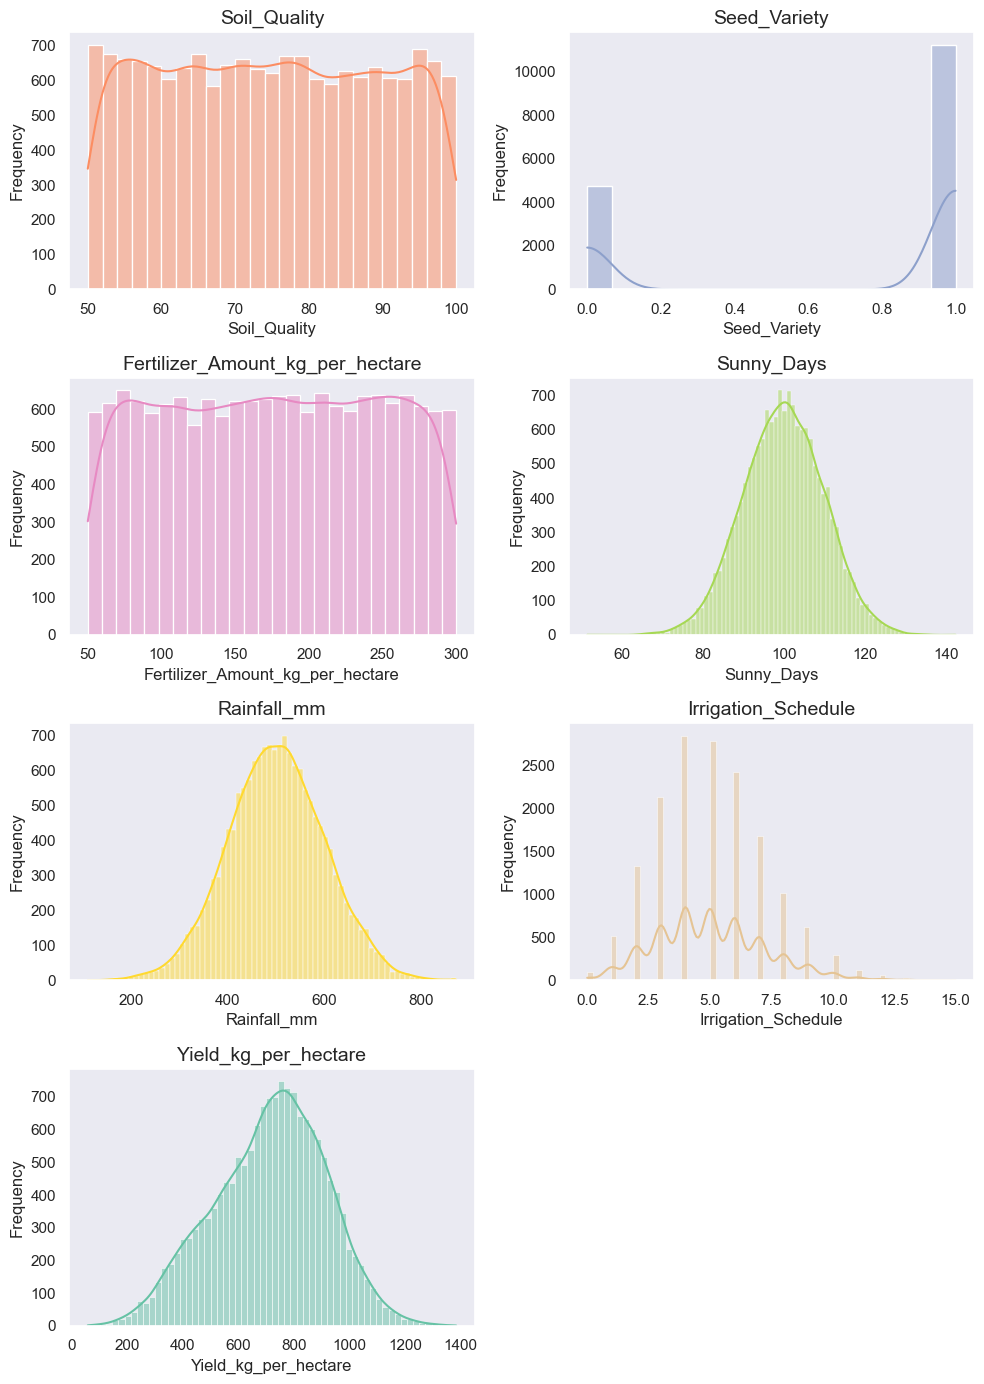

In [13]:
df = pd.DataFrame(data)

# Set a dark theme with dark background and adjust color palette
sns.set_theme(style="dark", palette="dark")

# Create a list of features to visualize
features = [
    "Soil_Quality", 
    "Seed_Variety", 
    "Fertilizer_Amount_kg_per_hectare", 
    "Sunny_Days", 
    "Rainfall_mm", 
    "Irrigation_Schedule", 
    "Yield_kg_per_hectare"
]

# Create subplots for univariate analysis
plt.figure(figsize=(10, 14))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], kde=True, color=sns.color_palette("Set2")[i % len(features)])
    plt.title(f"{feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(False)  # Disable the grid

plt.tight_layout()
plt.show()

- **Interpretation**
- Soil Quality: Even distribution of soil quality 
- Seed Variety: Binary distribution indicating two distinct seed varieties.
- Fertilizer Amount: Uniform spread of fertilizer.
- Sunny Days: Normal distribution with a peak around 100 sunny days.
- Rainfall: Normal distribution peaking at 500 mm.
- Irrigation Schedule: Multiple peaks showing variable irrigation practices.
- Yield: Normal distribution with a peak around 800 kg/ha.

#### 📊 *Box Plot for Distribution of Data (Outliers Included):* 📉

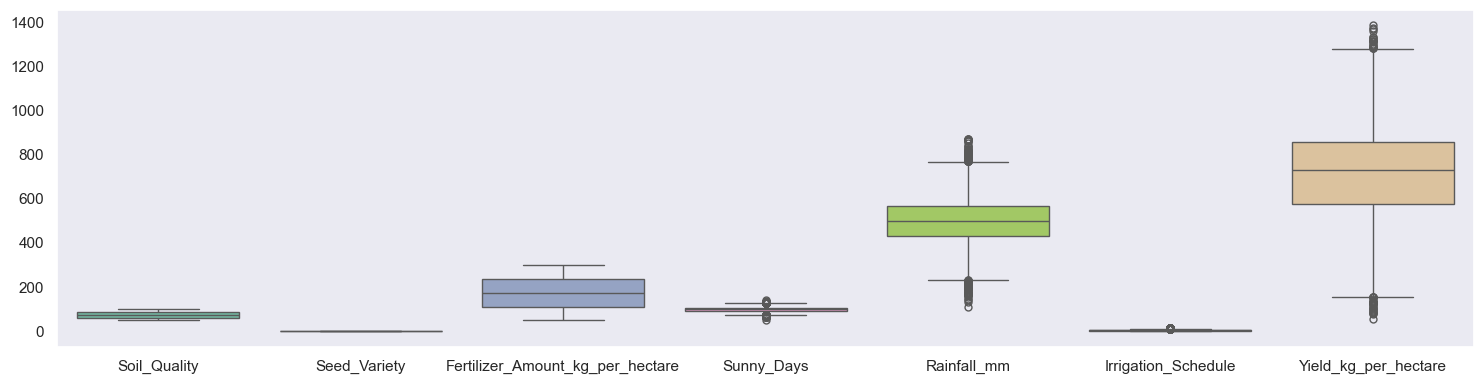

In [14]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, palette="Set2", fliersize=5)
plt.tight_layout()
plt.show()

- **Interpretation**
- Soil_Quality: Low variability
- Seed_Variety: No variation
- Fertilizer_Amount_kg_per_hectare: Significant variability
- Sunny_Days: Consistent
- Rainfall_mm: High variability
- Irrigation_Schedule: No variation
- Yield_kg_per_hectare: Significant variability

#### 📊 *a) Violin Plot for Yield by Seed Variety:* 🌱

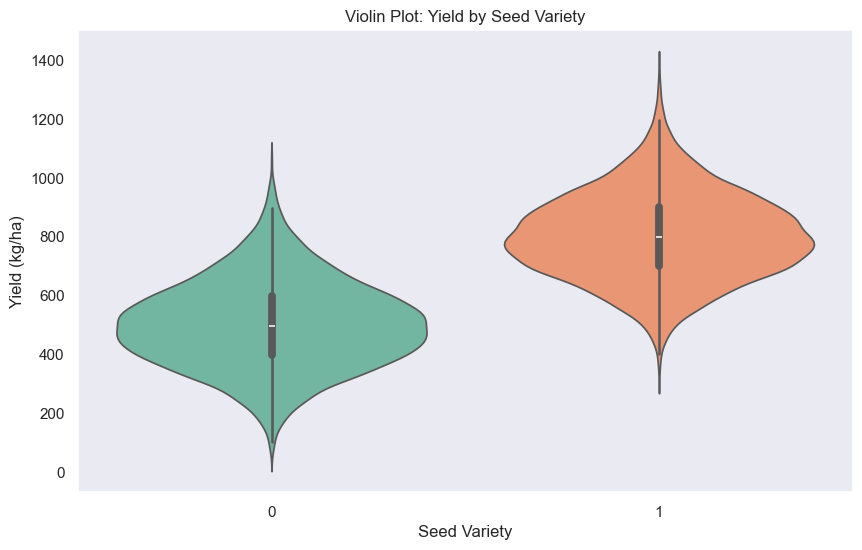

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Seed_Variety', y='Yield_kg_per_hectare', data=data, palette='Set2')
plt.title('Violin Plot: Yield by Seed Variety')
plt.xlabel('Seed Variety')
plt.ylabel('Yield (kg/ha)')
plt.show()

- **Interpretation**
- The yield distribution for seed variety 1 is wider with a higher median compared to seed variety 0.

#### 📊 *a) Violin Plot for Yield Distribution by Irrigation Schedule:* 💧

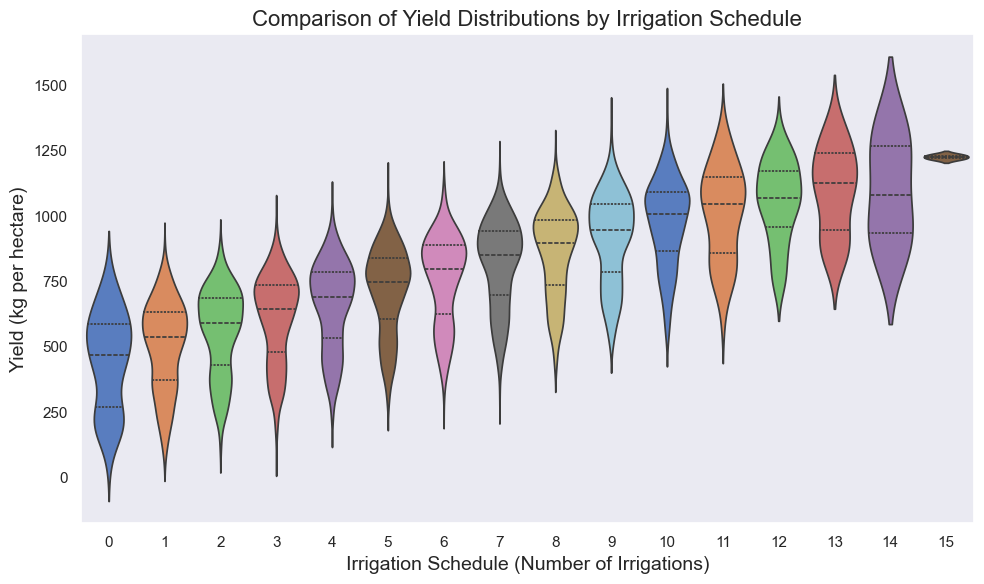

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Irrigation_Schedule', y='Yield_kg_per_hectare', 
               palette='muted', inner='quart', scale='width')

# Set labels and title
plt.title('Comparison of Yield Distributions by Irrigation Schedule', fontsize=16)
plt.xlabel('Irrigation Schedule (Number of Irrigations)', fontsize=14)
plt.ylabel('Yield (kg per hectare)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

- **Interpretation**
- The violin plot shows increasing crop yields with more irrigation events, highlighting variability in distribution.
- It underscores irrigation's significant impact on yields, providing insights for optimizing water usage and agricultural productivity.

#### 📊 *c) Scatter Plot with Regression Line for Fertilizer Amount vs. Yield:* 🌱

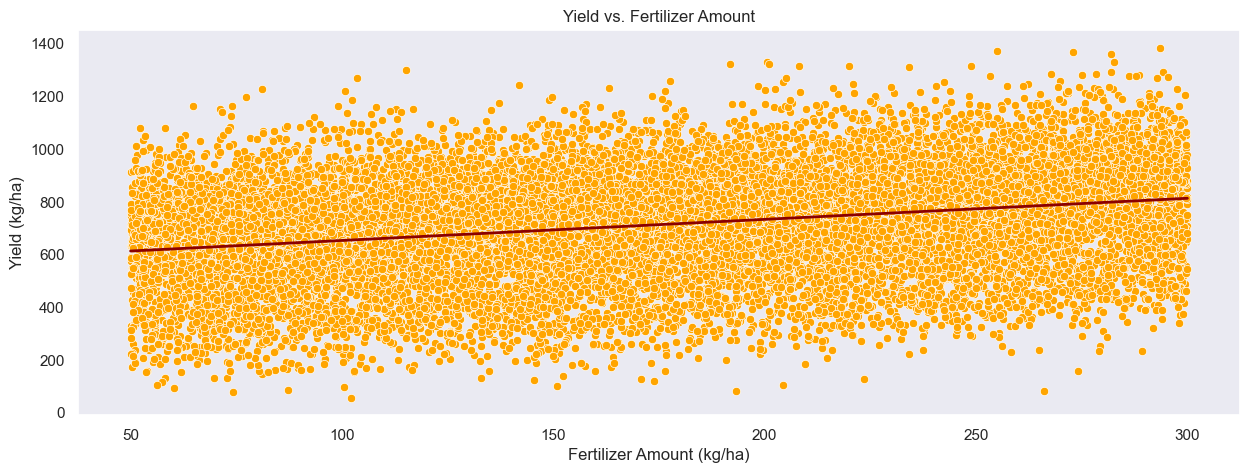

In [17]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Fertilizer_Amount_kg_per_hectare', y='Yield_kg_per_hectare', data=data, color='orange')
sns.regplot(x='Fertilizer_Amount_kg_per_hectare', y='Yield_kg_per_hectare', data=data, scatter=False, color='darkred', line_kws={'linewidth': 2, 'linestyle': '-'})

plt.title('Yield vs. Fertilizer Amount')
plt.xlabel('Fertilizer Amount (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()

- **Interpretation**
- The scatter plot shows a relationship between fertilizer amount (kg/ha) and crop yield (kg/ha).
- The red regression line indicates a positive correlation; as the fertilizer amount increases, yield tends to increase slightly.

#### 📊 *d) Scatter Plot with Regression Line: Yield vs. Rainfall* 🌧️🌾

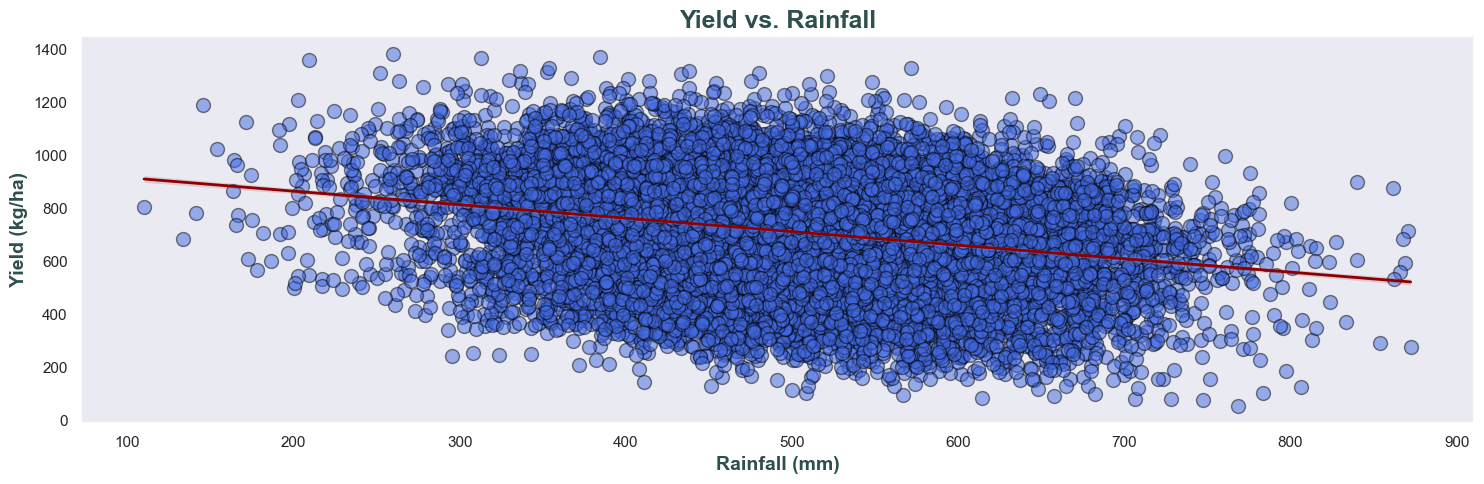

In [18]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Rainfall_mm', y='Yield_kg_per_hectare', data=data, color='royalblue', s=100, edgecolor='black', linewidth=1,alpha=0.5)

sns.regplot(x='Rainfall_mm', y='Yield_kg_per_hectare', data=data, scatter=False, color='darkred', line_kws={'linewidth': 2, 'linestyle': '-'})

plt.title('Yield vs. Rainfall', fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel('Rainfall (mm)', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Yield (kg/ha)', fontsize=14, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()

- **Interpretation**
- The scatterplot shows a negative linear relationship between rainfall (in mm) and yield (in kg/ha), as indicated by the downward-sloping red regression line.
- Excessive rainfall might negatively impact yield, possibly due to over-saturation of soil or crop damage.

#### 📊 *d) Correlation Heatmap for Numeric Variables:* 🔍

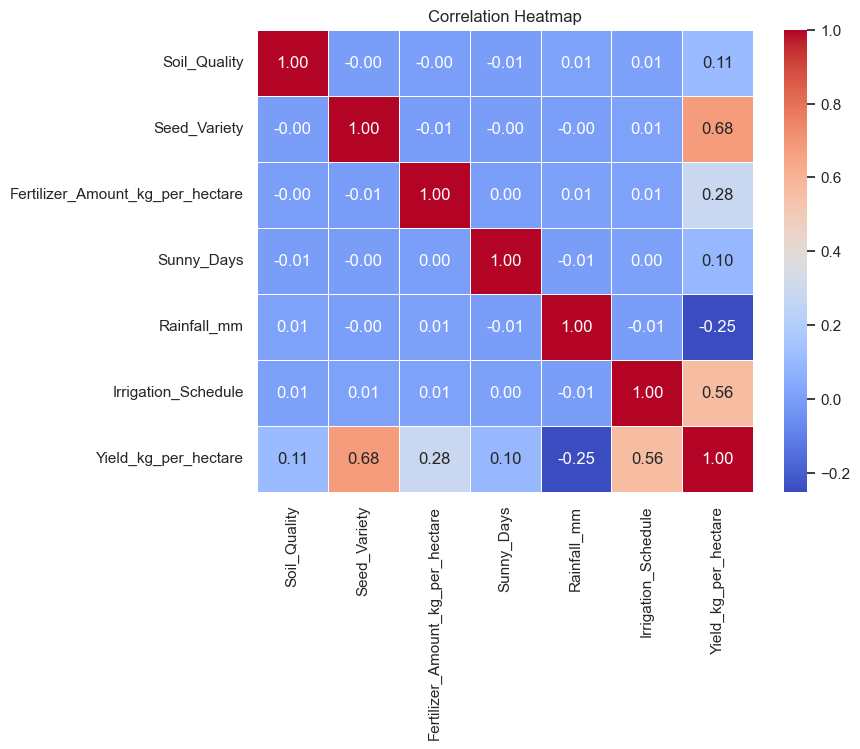

In [19]:
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()


- **Interpretation**
- Seed Variety has the strongest positive correlation with yield (𝑟=0.68), indicating it is an important factor for yield prediction.
- Irrigation Schedule (𝑟=0.56) and Fertilizer Amount (𝑟=0.28) also positively influence yield.
- Rainfall has a weak negative correlation (𝑟=−0.25), confirming its potential adverse effects at high levels.
- Sunny Days and Soil Quality show negligible correlations (𝑟=0.10 and 𝑟=0.11).

#### 📊 *c) 3D Scatter Plot for Yield vs. Seed Variety & Irrigation Schedule:* 🌱

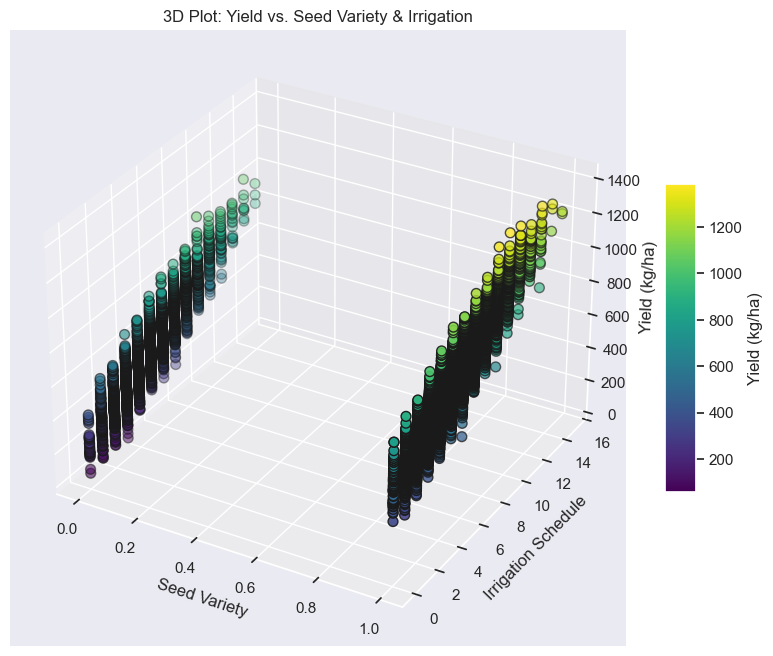

In [20]:
 from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Seed_Variety'], data['Irrigation_Schedule'], data['Yield_kg_per_hectare'],
    c=data['Yield_kg_per_hectare'], cmap='viridis', edgecolor='k', s=50
)
ax.set_xlabel("Seed Variety")
ax.set_ylabel("Irrigation Schedule")
ax.set_zlabel("Yield (kg/ha)")
ax.set_title("3D Plot: Yield vs. Seed Variety & Irrigation")
plt.colorbar(scatter, shrink=0.5, aspect=10, label="Yield (kg/ha)")
plt.show()

- **Interpretation**
- Yield increases as both seed variety improves (closer to 1.0) and irrigation frequency increases.
- Seed varieties closer to higher values (e.g., 0.8–1.0) combined with higher irrigation schedules (10–14) result in maximum yields.
- Poor irrigation (e.g., <5) yields minimal output, regardless of seed variety.

## 🛠️✨ Preprocessing: Cleaning and Preparing Data 🧹📊

### 🧹 Outlier Treatment: Improving Model Accuracy by Handling Outliers 

In [21]:
X, Y = data.drop(columns="Yield_kg_per_hectare"), data[["Yield_kg_per_hectare"]]

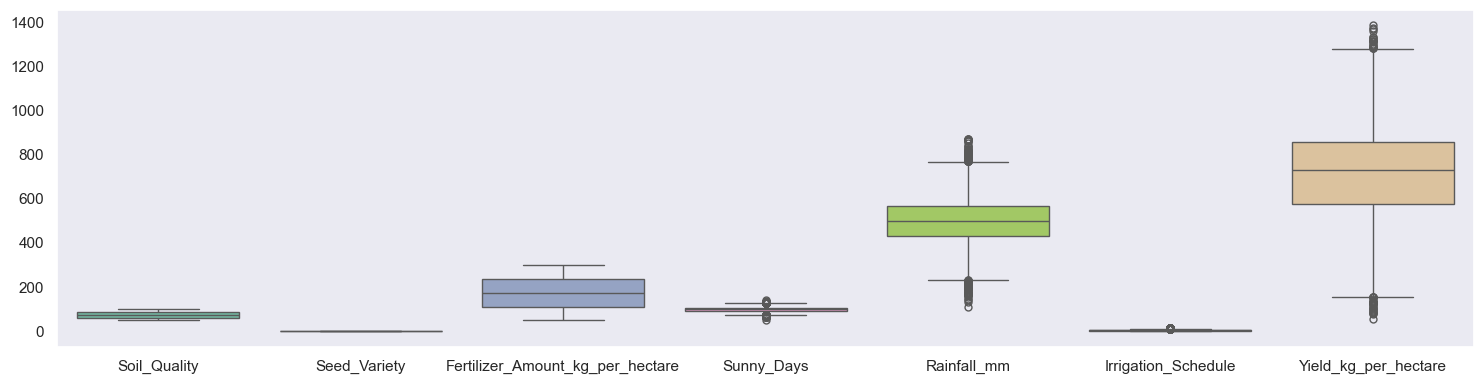

In [44]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, palette="Set2", fliersize=5)
plt.tight_layout()
plt.show()

- **Interpretation**
- Soil_Quality: Low variability
- Seed_Variety: No variation
- Fertilizer_Amount_kg_per_hectare: Significant variability
- Sunny_Days: Consistent
- Rainfall_mm: High variability
- Irrigation_Schedule: No variation
- Yield_kg_per_hectare: Significant variability

In [23]:
def replace_outliers_with_mean(data):
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:  
            q1 = data[col].quantile(0.25)  
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1  

            
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
        
            non_outlier_mean = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()

            data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), non_outlier_mean, data[col])
    return data


In [24]:
data1 = replace_outliers_with_mean(X)

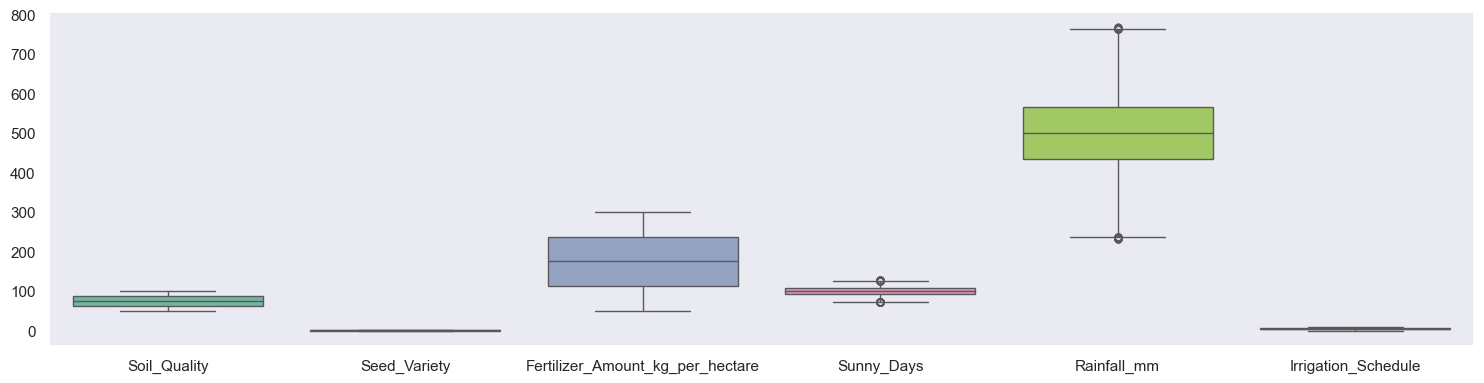

In [25]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data1, palette="Set2", fliersize=5)
plt.tight_layout()
plt.show()

- **Interpretation**

1. **Soil_Quality**: Stable before, even less variable after replacing outliers with the mean.
2. **Seed_Variety**: No variation before or after.
3. **Fertilizer_Amount_kg_per_hectare**: High variability before, reduced after outlier treatment.
4. **Sunny_Days**: Consistent before, more consistent after outlier treatment.
5. **Rainfall_mm**: High variability before, reduced after outlier treatment.
6. **Irrigation_Schedule**: No variation before or after.
7. **Yield_kg_per_hectare**: High variability before, reduced after outlier treatment.

### ⚖️📏 Standardizing: Scaling Features for Balanced Data 🌟

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(data1),columns=data1.columns)
X1.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule
0,1.490574,0.651538,-0.379691,-0.555297,-0.586055,-0.930268
1,1.210921,-1.534831,1.478208,-0.978718,0.176675,0.984487
2,-0.760181,0.651538,-0.518473,-0.272061,-0.835277,1.463176
3,1.054793,0.651538,-1.031443,1.392461,0.491182,0.984487
4,0.470857,0.651538,0.665692,-1.750792,-0.685313,0.505798


- **Interpretation**
- The data has been scaled using standardization 🔄 to ensure that no single feature dominates the model.
- Each feature is normalized to have a mean of 0 and a standard deviation of 1 📊, making the values comparable across different variables.


## Hypothesis Testing: 🧠📊🔍

#### Shapiro-Wilk Normality Test 🧪📊

Training data shape: (12800, 6)
Test data shape: (3200, 6)
Shapiro-Wilk Statistic: 0.9991655763569561, P-value: 0.14126701805907577
The residuals are normally distributed (fail to reject H0).


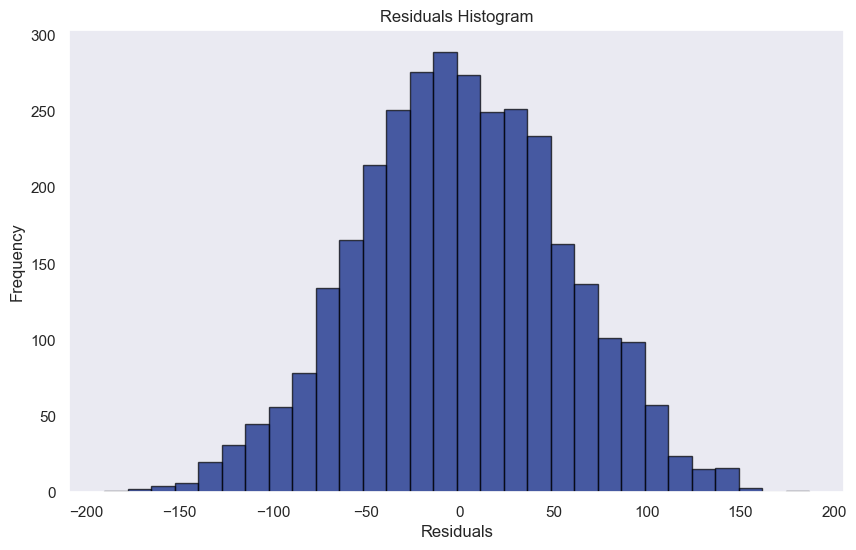

In [27]:
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X, Y = data.drop(columns="Yield_kg_per_hectare"), data[["Yield_kg_per_hectare"]]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check if the number of features in X_train and X_test are aligned
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Prediction
y_pred = rf.predict(X_test)  # Note: Use rf instead of rfr, as that was likely a typo

# Ensure y_test is a 1D series and y_pred is also 1D
y_test = y_test.values.flatten()
y_pred = y_pred.flatten()

# Calculate residuals
residuals = y_test - y_pred

# Perform Shapiro-Wilk test for normality of residuals
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("The residuals are not normally distributed (reject H0).")
else:
    print("The residuals are normally distributed (fail to reject H0).")

# Plotting the Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


- **Interpretation** 
- The Shapiro-Wilk test generates a test statistic close to 1 if the data are normally distributed.
- normally distributed residuals indicate that the model's errors are random and the model is unbiased.

### Permutation Importance 📊🔍

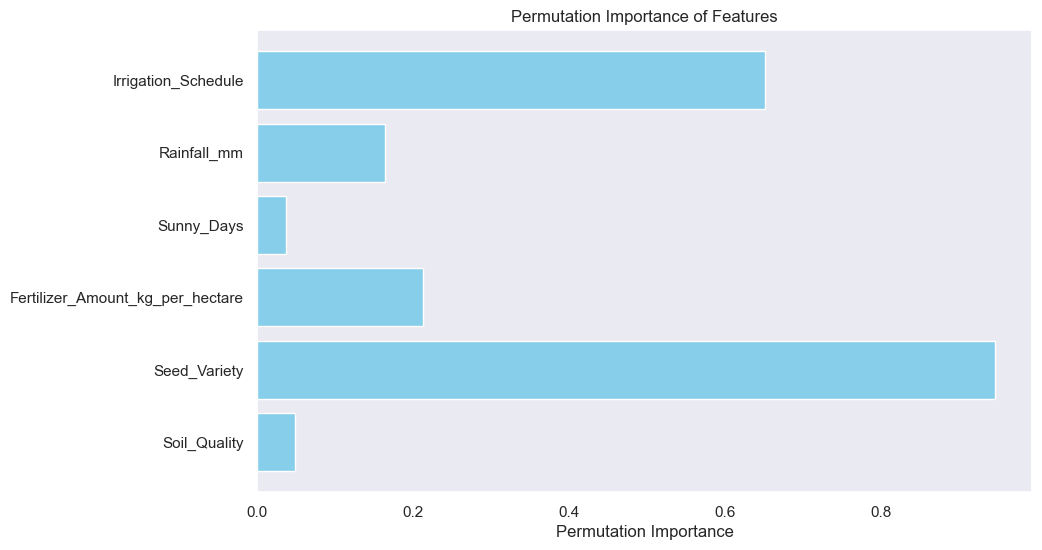

In [28]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset and 'Yield_kg_per_hectare' is the target column
X, y = data.drop(columns="Yield_kg_per_hectare"), data[["Yield_kg_per_hectare"]]

# Random Forest Model (ensure you have the model trained)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X, y)

# Permutation importance
result = permutation_importance(rfr, X, y, n_repeats=10, random_state=42)

# Plotting the Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, result.importances_mean, color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()


#### Interpretation of Permutation Importance 📊🔍

Permutation Importance measures the decrease in model performance (e.g., R², accuracy) when the values of a particular feature are randomly shuffled, disrupting its relationship with the target variable. 

- **🌾 Seed_Variety**: This feature has the highest importance, indicating it is the most critical predictor of yield. Changes to this feature have the greatest impact on model performance.
- **💧 Irrigation_Schedule**: The second most important feature, suggesting that the irrigation plan significantly influences the target.
- **☀️ Sunny_Days** and **🌱 Soil_Quality**: These have the least importance, implying they have a minimal effect on the model's predictions.


 ### 🏗️📊 Model Building: 🚀📈📉

### 📈➕ Linear Regression: The Simplest Path to Prediction 🧮

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)   
# Print evaluation metrics
print(f"Accuracy (R-squared): {accuracy}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Accuracy (R-squared): 0.9005858685280783
Mean Squared Error (MSE): 4175.306378019714
Mean Absolute Error (MAE): 45.44144971207596
Root Mean Squared Error (RMSE): 64.61661069740283


- **Interpretation**
- **The model has an excellent fit (R² = 0.90 🎯), with moderate error (MSE = 4175.31 📉, MAE = 45.44 ⚖️) and a decent RMSE (64.62 📏).**

### 🌳🌲 Random Forest: Ensemble of Decision Trees 🎯

In [30]:
x_train, x_test , y_train ,y_test = train_test_split(X1,Y,test_size=.20,random_state=42)
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

pred = rfr.predict(x_test)
acc = r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred) 
rmse = root_mean_squared_error(y_test,pred)
print(f"Accuracy : {acc}" ) 
print(f"MSE:{mse}")
print(f"MAE: {mae}")
print(f"RMSE:{rmse}")

Accuracy : 0.9229839419484889
MSE:3234.6069279218464
MAE: 45.51091963476996
RMSE:56.87360484373965


- **Interpretation**
- **The model shows a strong fit (R² = 0.92 🎯), with moderate error (MSE = 3244.15 📉, MAE = 45.44 ⚖️) and relatively low RMSE (56.96 📏).**

### 🌟🚀 XGBRegressor: Extreme Gradient Boosting Power 🔥

In [31]:
model = XGBRegressor()
model.fit(x_train,y_train)

pred = model.predict(x_test)
acc = r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred) 
rmse = root_mean_squared_error(y_test,pred)
print(f"Accuracy : {acc}" ) 
print(f"MSE:{mse}")
print(f"MAE: {mae}")
print(f"RMSE:{rmse}")

Accuracy : 0.9214376211166382
MSE:3299.5513552008592
MAE: 45.851984046250024
RMSE:57.44172138089926


- **Interpretation**
- **The model has a strong fit (R² = 0.92 🎯), with moderate error (MSE = 3299.55 📉, MAE = 45.85 ⚖️) and low RMSE (57.44 📏).**

### ⚡📉 Support Vector Regression (SVR): Precision in Predictions 🎯

In [32]:
svm_model = SVR(kernel='rbf') 
svm_model.fit(x_train, y_train)

# Predict and calculate metrics
svm_pred = svm_model.predict(x_test)
svm_acc = r2_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)

print(f"SVM Regression Accuracy (R2): {svm_acc}")
print(f"SVM MSE: {svm_mse}")
print(f"SVM MAE: {svm_mae}")
print(f"SVM RMSE: {svm_rmse}")


SVM Regression Accuracy (R2): 0.8320249450620533
SVM MSE: 7054.805064898723
SVM MAE: 59.40752625741945
SVM RMSE: 83.99288698990364


- **Interpretation**
- **The model has a strong fit (R² = 0.83 🎯), with moderate error (MSE = 7054.81 📉, MAE = 59.41 ⚖️) and moderate RMSE (83.99 📏).**


### 🤝📈 KNeighborsRegressor: Collaborative Predictive Power 🌟

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(x_train, y_train)

knn_pred = knn_model.predict(x_test)

knn_acc = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"KNN Regression Accuracy (R2): {knn_acc}")
print(f"KNN MSE: {knn_mse}")
print(f"KNN MAE: {knn_mae}")
print(f"KNN RMSE: {knn_rmse}")


KNN Regression Accuracy (R2): 0.8725481980142655
KNN MSE: 5352.86396251867
KNN MAE: 54.134681126997855
KNN RMSE: 73.16326921699624


- **Interpretation**
- **The model has a strong fit (R² = 0.87 🎯), with moderate error (MSE = 5352.86 📉, MAE = 54.13 ⚖️) and moderate RMSE (73.16 📏).**


## **🚀 Model Comparison 📊: Accuracy Analysis ✅**

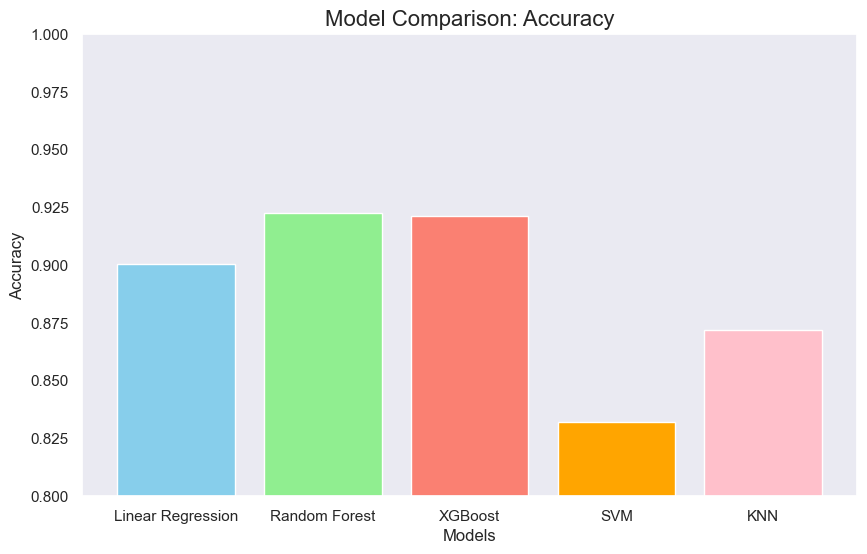

In [34]:
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN']
accuracies = [0.9006, 0.9225, 0.9214, 0.8320, 0.872]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'pink'])

# Adding title and labels
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.ylim([0.8, 1])

plt.show()


- **Interpretation**
- **Random Forest** achieves the highest accuracy, followed by **XGBoost**, which shows a strong fit.
- **Linear Regression** has moderate accuracy, performing better than **SVM** and **KNN** models.
- **SVM** and **KNN** models have the lowest accuracy, suggesting they may require further tuning to improve performance.


### **📊 Model Comparison: Cross-Validation Results & R² Scores for Regression Models 🔍**

Linear Regression - Mean R²: 0.8963898620858426 | Std Dev: 0.004463942794734818
R² Scores: [0.89830482 0.89937249 0.89961502 0.88765518 0.8970018 ]
--------------------------------------------------
Random Forest - Mean R²: 0.9200767542466466 | Std Dev: 0.0020855913383187466
R² Scores: [0.92162351 0.91951842 0.91691691 0.91933188 0.92299305]
--------------------------------------------------
XGBoost - Mean R²: 0.9196466922760009 | Std Dev: 0.002702517812896103
R² Scores: [0.92104816 0.92145222 0.91564429 0.91730958 0.9227792 ]
--------------------------------------------------
SVM - Mean R²: 0.8262883041126117 | Std Dev: 0.0039012552843349976
R² Scores: [0.82625047 0.83178247 0.82619956 0.81963599 0.82757302]
--------------------------------------------------
KNN - Mean R²: 0.8683571856522164 | Std Dev: 0.0048151992040746175
R² Scores: [0.87231886 0.86811218 0.871349   0.85914107 0.87086481]
--------------------------------------------------


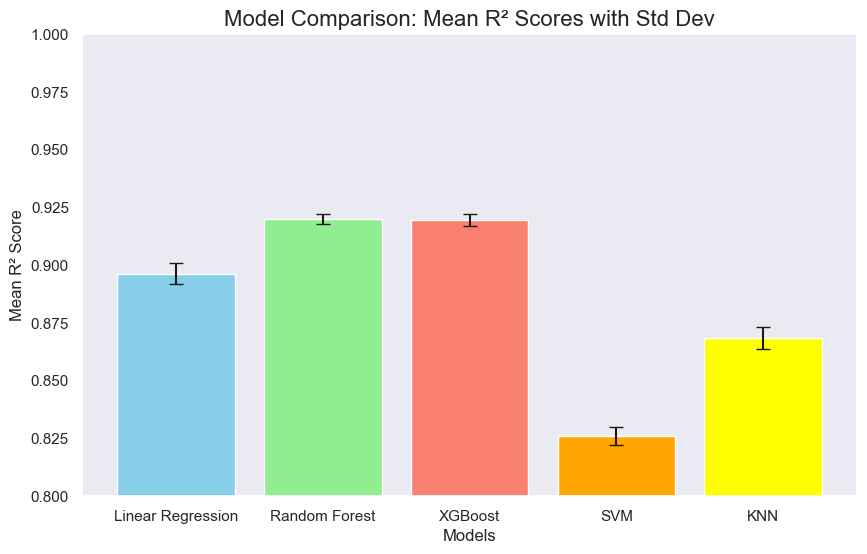

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    'SVM': SVR(kernel='rbf'),  # Support Vector Machine
    'KNN': KNeighborsRegressor(n_neighbors=5)  # K-Nearest Neighbors
}

k = 5
results = {}

for model_name, model in models.items():
    # Perform cross-validation and store results
    cv_scores = cross_val_score(model, X1, Y, cv=k, scoring='r2')
    results[model_name] = {
        'R² Scores': cv_scores,
        'Mean R²': cv_scores.mean(),
        'Std Dev': cv_scores.std()
    }

for model_name, result in results.items():
    print(f"{model_name} - Mean R²: {result['Mean R²']} | Std Dev: {result['Std Dev']}")
    print(f"R² Scores: {result['R² Scores']}")
    print("-" * 50)

model_names = list(results.keys())
mean_r2_scores = [result['Mean R²'] for result in results.values()]
std_devs = [result['Std Dev'] for result in results.values()]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_r2_scores, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow'], yerr=std_devs, capsize=5)
plt.title('Model Comparison: Mean R² Scores with Std Dev', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean R² Score', fontsize=12)

# Show the plot
plt.ylim([0.8, 1]) 
plt.show()


- **Interpretation**
- **Random Forest** shows the highest mean R² score (0.92 🎯), with a low standard deviation (0.0021 📊), indicating excellent consistency and strong model performance.
- **XGBoost** has a similar mean R² score (0.92 🎯), with slightly higher variability (0.0027 📉), reflecting stable but slightly more fluctuating performance.
- **Linear Regression** performs well (Mean R² = 0.90 🎯), with a small standard deviation (0.0045 📏), suggesting reliable predictions but less accuracy than the tree-based models.
- **KNN** achieves a moderate mean R² (0.87 📈), with higher variability (0.0048 📊), indicating some instability but still reasonable performance.
- **SVM** shows the lowest mean R² (0.83 ⚠️), with a standard deviation of 0.0039 📉, indicating relatively weak and inconsistent performance compared to the other models.


### Hyperparameter Tuning Results 🎯🔧


- **Fitting 5 folds for each of 324 candidates, totalling 1620 fits**
- **Best Hyperparameters:**
  - `max_depth`: 30
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 200
- **Test R² (Best Model):** 0.92



### 🎯 Random Forest Regressor: Model Evaluation After Hyperparameter Tuning 📊

In [36]:
x_train, x_test , y_train ,y_test = train_test_split(X1,Y,test_size=.20,random_state=42)
rfr = RandomForestRegressor(max_depth=30,max_features="sqrt",min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rfr.fit(x_train,y_train)

pred = rfr.predict(x_test)
acc = r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred) 
rmse = root_mean_squared_error(y_test,pred)
print(f"Accuracy : {acc}" ) 
print(f"MSE:{mse}")
print(f"MAE: {mae}")
print(f"RMSE:{rmse}")

Accuracy : 0.9208575842815101
MSE:3323.9120860260005
MAE: 45.63639870122734
RMSE:57.6533787910648


- **Interpretation**
- **Accuracy: 91.97%** 🎯: The model predicts correctly 91.97% of the time.
- **MSE: 3374.80** 📉: The average squared error between predicted and actual values.
- **MAE: 46.11** 🔍: On average, the model's predictions are off by 46 units.
- **RMSE: 58.09** 📊: The model's typical error is 58.09 units.

### **🌲 Feature Importances in Random Forest Model 🔍: Visualizing Feature Impact**

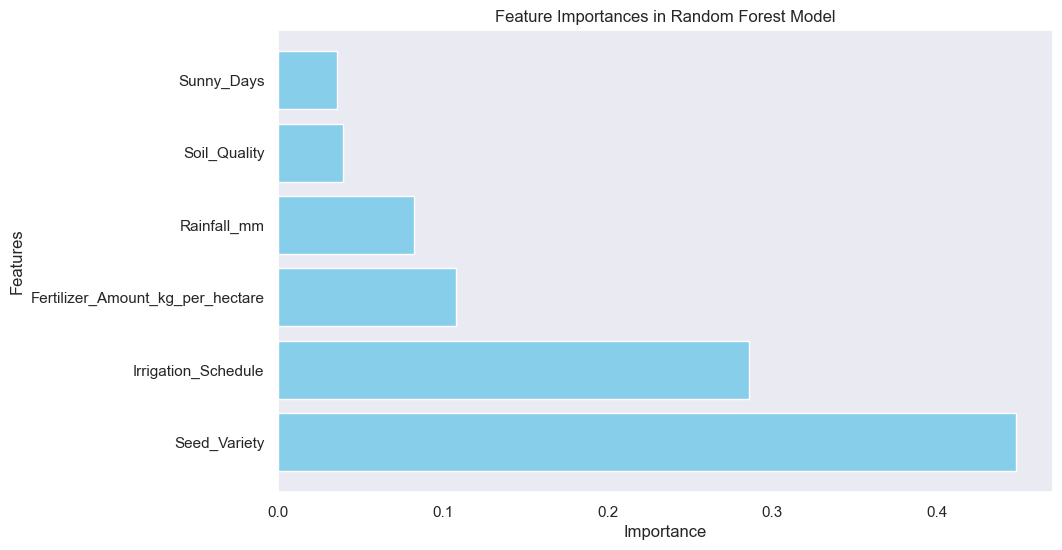

In [37]:
feature_importances = rfr.feature_importances_
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Model')
plt.show()

- **Interpretation**
1. 🌱 **Seed_Variety** is the most important feature, having the highest impact on the model's predictions.
2. 💧 **Irrigation_Schedule** holds significant influence on the model's output.
3. 🌾 **Fertilizer_Amount_kg_per_hectare** contributes moderately to the model's predictions.
4. 🌧️ **Rainfall_mm** plays a smaller, but still notable role in the model.
5. 🦠 **Soil_Quality** has minimal importance in the model.
6. ☀️ **Sunny_Days** is the least important feature in the Random Forest Model.

### **"🔍 SHAP Feature Importance & Insights 📊"**

Random Forest Regression Accuracy (R2): 0.922263448603589
Random Forest MSE: 3264.867016842209
Random Forest MAE: 45.579065118870425
Random Forest RMSE: 57.13901483961908


  0%|          | 0/3200 [00:00<?, ?it/s]

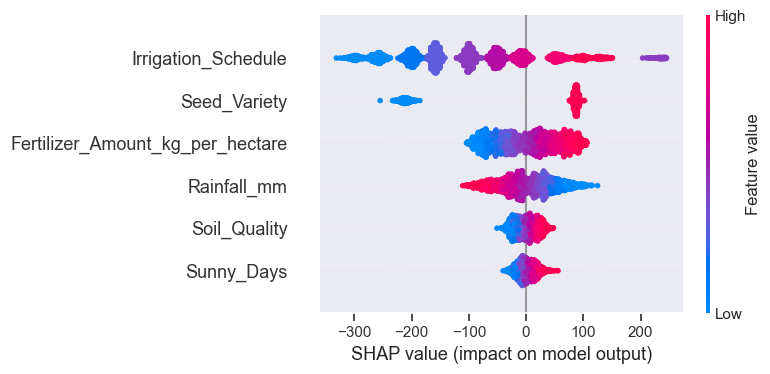

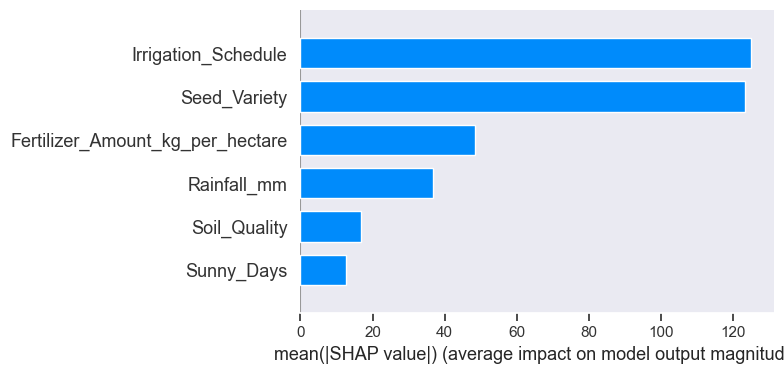

In [38]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(x_train, y_train)

# Make predictions on the test set (ensure x_test is defined)
rf_pred = rf_model.predict(x_test)

# Evaluate model performance
rf_acc = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest Regression Accuracy (R2): {rf_acc}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")

# Reduce the number of background samples to improve performance
# Using SHAP's sample or kmeans to summarize the background data
background_data = shap.kmeans(x_train, 10)  # 10 is the number of clusters/samples

# Create a SHAP explainer using KernelExplainer for Random Forest model
explainer = shap.KernelExplainer(rf_model.predict, background_data)

# Get SHAP values for the test set (or x_test if preferred)
shap_values = explainer.shap_values(x_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, x_test)

# Plot feature importance based on SHAP values (bar plot)
shap.summary_plot(shap_values, x_test, plot_type="bar")


- **Interpretation**
- 🌊 Irrigation_Schedule: High values have a significant positive impact on the model output.
- 🌱 Seed_Variety: Different varieties have varying impacts, with some having a strong positive effect.
- 💧 Fertilizer_Amount_kg_per_hectare: Higher amounts generally increase the model output.
- 🌧️ Rainfall_mm: More rainfall tends to have a positive impact, but the effect varies.
- 🌍 Soil_Quality: Better soil quality has a moderate positive impact.
- ☀️ Sunny_Days: More sunny days have a smaller positive impact.

### 📊 PDP (Partial Dependence Plot) for Feature Importance 🚀

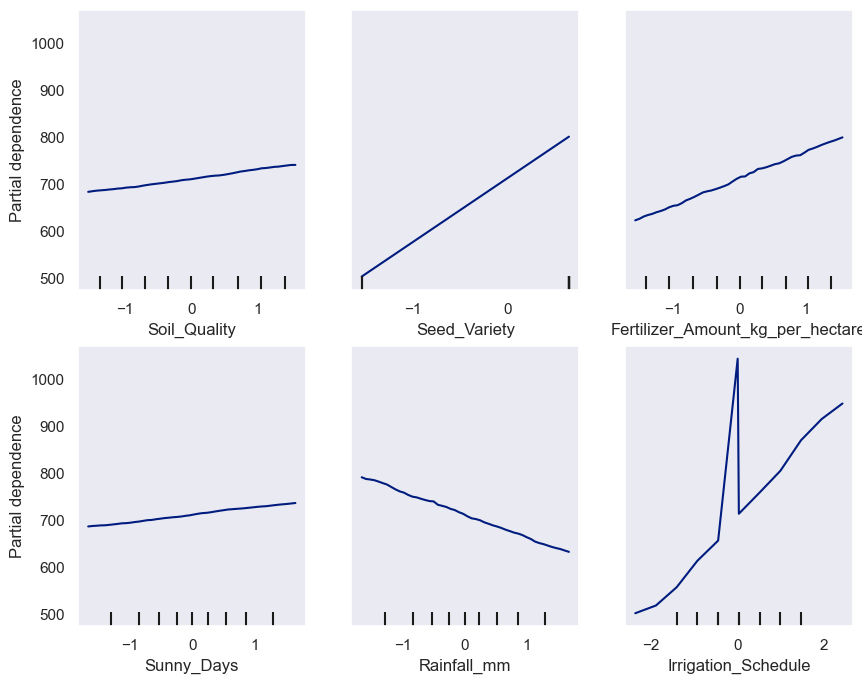

In [39]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Assuming X1 is your feature data and Y is your target
X_train, X_val, y_train, y_val = train_test_split(X1, Y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Choose the features for which you want to plot the PDP
features = [0, 1, 2,3,4,5]  # Indices of features to plot

# Plot Partial Dependence using the correct method
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(model, X_train, features=features, grid_resolution=50, ax=ax)

plt.show()



- **Interpretation**
1. 🌱 **Soil Quality**: Better soil quality leads to a slight increase in crop yield.
2. 🌾 **Seed Variety**: Different seed varieties have a significant impact on crop yield.
3. 🌿 **Fertilizer Amount**: More fertilizer gradually increases crop yield.
4. ☀️ **Sunny Days**: More sunny days slightly improve crop yield.
5. 🌧️ **Rainfall**: Higher rainfall slightly decreases crop yield.
6. 🚿 **Irrigation Schedule**: Optimal irrigation schedules significantly boost crop yield.

### 📉 Learning Curve: Model Performance Analysis After Hyperparameter Tuning 🔍

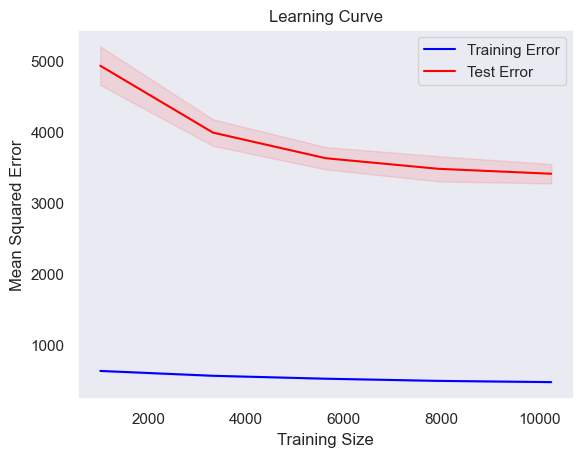

In [40]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    rfr, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


- **Interpretation**
- 📉 The training error remains consistently low, indicating the model fits the training data well.
- 📈 The test error decreases as the training size increases, suggesting the model generalizes better with more data.
- 🔍 The gap between training and test error narrows with larger training sizes, indicating reduced overfitting.

### 🔍 Residuals vs Predicted Values 📉


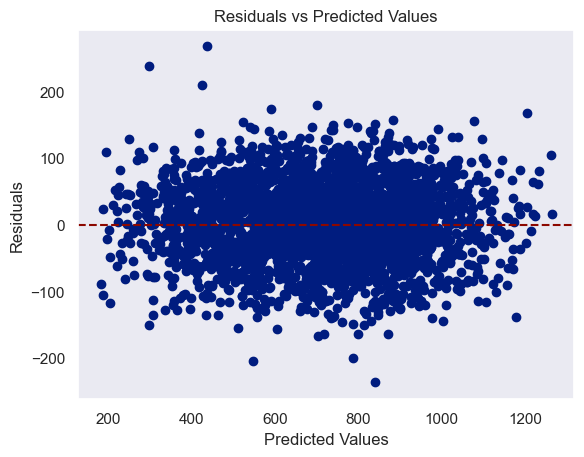

In [41]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

# Ensure y_val is a 1D array, if it's a DataFrame, select the column
y_val = y_val.squeeze()  # This makes sure y_val is 1D if it's a DataFrame

# Calculate residuals (difference between actual and predicted values)
residuals = y_val - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


- **Interpretation**
- 📉 Random Scatter: Residuals are randomly scattered around zero, indicating a good model fit.
- ✅ No Pattern: No clear pattern in residuals, suggesting the model's assumptions are likely met.
- 🔍 Consistent Spread: Residuals spread consistently across predicted values, implying homoscedasticity.

 ### 📈 Model Evaluation: MSE & R² Analysis 🔍


In [42]:

X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.2f}")
print(f"Validation/Test MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Validation/Test R²: {test_r2:.2f}")

# Check for overfitting or underfitting
if train_r2 > 0.9 and (train_r2 - test_r2) > 0.1:
    print("The model is overfitting: It performs well on training data but poorly on test data.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting: It performs poorly on both training and test data.")
else:
    print("The model has a good fit: It generalizes well to unseen data.")



Training MSE: 456.39
Validation/Test MSE: 3264.87
Training R²: 0.99
Validation/Test R²: 0.92
The model has a good fit: It generalizes well to unseen data.


- The model shows excellent training performance with a high R² value 📈💯 

In [43]:
# Save the trained model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'
